In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt


### Load data 

In [28]:
X_train = pd.read_csv('../../data/representation.eng.train.csv').to_numpy()
y_train = pd.read_csv('../../data/true_labels.eng.train.csv')

X_test = pd.read_csv('../../data/representation.eng.testa.csv').to_numpy()
y_test = pd.read_csv('../../data/true_labels.eng.testa.csv')

X_test2 = pd.read_csv('../../data/representation.eng.testb.csv').to_numpy()
y_test2 = pd.read_csv('../../data/true_labels.eng.testb.csv')


### Preprocessing

In [29]:

y_train['O'] = y_train['O'].apply(lambda x: 1 if x == 'I-PER' else 0)

y_test['O'] = y_test['O'].apply(lambda x: 1 if x == 'I-PER' else 0)

y_test2['O'] = y_test2['O'].apply(lambda x: 1 if x == 'I-PER' else 0)

## Logistic regression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=10000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9954977488744372


In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


datasets = [
    (X_test, y_test),
    (X_test2, y_test2)
]

for i, (X_test, y_test) in enumerate(datasets, 1):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"Test Set {i}: Accuracy = {accuracy:.4f}, Precision = {precision:.4f}, Recall = {recall:.4f}, F1 Score = {f1:.4f}")


Test Set 1: Accuracy = 0.9955, Precision = 0.9633, Recall = 0.9955, F1 Score = 0.9955
Test Set 2: Accuracy = 0.9925, Precision = 0.9621, Recall = 0.9925, F1 Score = 0.9924


## Neural Network

In [33]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print (y_train.head())



(9999, 768) (9999, 1) (1999, 768) (1999, 1)
   O
0  0
1  0
2  0
3  0
4  0


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test2 = scaler.transform(X_test2)

# Neural network model
model = Sequential(
    [
        Input(shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ]

)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │        49,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,329 (200.50 KB)

 Trainable params: 51,329 (200.50 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
# Model training
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

def evaluate_model(model, X, y, test_set_name=""):
    y_pred = (model.predict(X) > 0.5).astype("int32")
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    print(f"{test_set_name}: Accuracy = {accuracy:.4f}, Precision = {precision:.4f}, Recall = {recall:.4f}, F1 Score = {f1:.4f}")

evaluate_model(model, X_test, y_test, "Test Set1 ")
evaluate_model(model, X_test2, y_test2, "Test Set2 ")



Epoch 1/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9980 - loss: 0.0057 - val_accuracy: 0.9880 - val_loss: 0.0771
Epoch 2/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9981 - loss: 0.0128 - val_accuracy: 0.9890 - val_loss: 0.0708
Epoch 3/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9979 - loss: 0.0071 - val_accuracy: 0.9890 - val_loss: 0.0828
Epoch 4/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9987 - loss: 0.0054 - val_accuracy: 0.9890 - val_loss: 0.0758
Epoch 5/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9967 - loss: 0.0107 - val_accuracy: 0.9880 - val_loss: 0.0622
Epoch 6/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9985 - loss: 0.0058 - val_accuracy: 0.9860 - val_loss: 0.0787
Epoch 7/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9992 - loss: 0.0030 - val_accuracy: 0.9910 - val_loss: 0.0703
Epoch 8/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9972 - loss: 0.0067 - val_accuracy: 0.

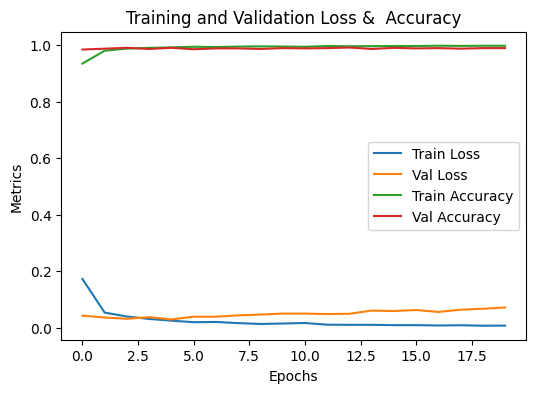

In [40]:
plt.figure(figsize=(6, 4))

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
#Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.title('Training and Validation Loss &  Accuracy')
plt.legend()
plt.show()